In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgvc6-plugins-gtk libxdot4
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 2s (46.8 kB/s)
Selecting previously unselected package libxdot4.
(Reading database ... 144487 files and d

In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

## SARS-CoV-2 - Human PPI Network

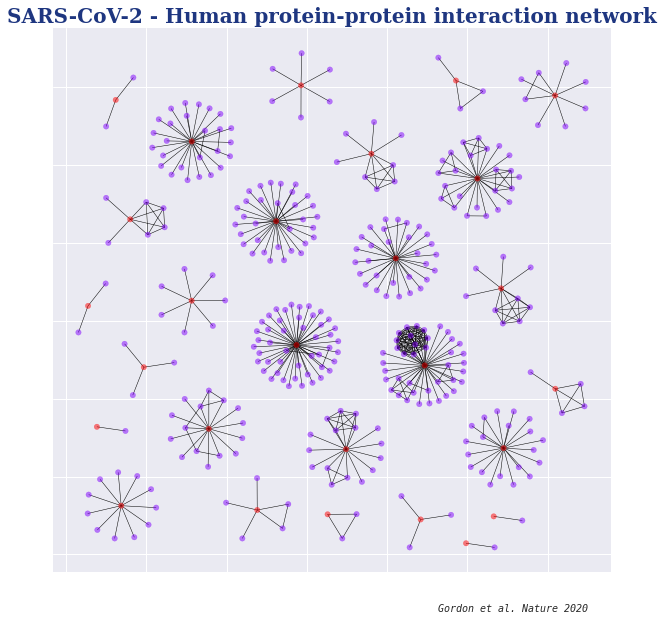

In [ ]:
#Load the graph
sarscov2_human = nx.read_graphml("./Networks_Challenge/SARS-CoV-2 Host-Pathogen Interaction Map (Fig. 3)).graphml")

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(sarscov2_human,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
d=dict(sarscov2_human.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(sarscov2_human, pos=pos, node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(sarscov2_human, pos=pos,width=0.5,arrows=False)
#Uncomment to label by node number
#nx.draw_networkx_labels(sarscov2_human,pos=pos, font_size=8, alpha=1)
plt.title("SARS-CoV-2 - Human protein-protein interaction network", fontname='serif', fontsize=20, fontweight='bold', color='#1E3680')
plt.text(1300, -150, 'Gordon et al. Nature 2020', horizontalalignment='right', verticalalignment='bottom', fontname='monospace', fontstyle='italic')
#plt.legend(["human", "interaction", "viral"], fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='lower right')
#human = [(int(d[n]["Bait_Boolean"])) for n in d if d[n]["Bait_Boolean"] == 0]
#viral = [(int(d[n]["Bait_Boolean"])) for n in d if d[n]["Bait_Boolean"] == 1]
#plt.legend((human, viral), ('human', 'viral'))

plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
nx.Graph(sarscov2_human)

In [ ]:
dic=dict(sarscov2_human.nodes(data=True))
dic2=collections.defaultdict(str)

for key in dic:
  dic2[key]=dic[key]['name']

sarscov2_human=nx.relabel_nodes(sarscov2_human,dic2)
sarscov2_human.nodes(data=True)
#1 --> COVID

NodeDataView({'E': {'name': 'E', 'Bait_Boolean': '1'}, 'AP3B1': {'name': 'AP3B1', 'Bait_Boolean': '0'}, 'BRD4': {'name': 'BRD4', 'Bait_Boolean': '0'}, 'BRD2': {'name': 'BRD2', 'Bait_Boolean': '0'}, 'CWC27': {'name': 'CWC27', 'Bait_Boolean': '0'}, 'ZC3H18': {'name': 'ZC3H18', 'Bait_Boolean': '0'}, 'SLC44A2': {'name': 'SLC44A2', 'Bait_Boolean': '0'}, 'M': {'name': 'M', 'Bait_Boolean': '1'}, 'PMPCB': {'name': 'PMPCB', 'Bait_Boolean': '0'}, 'YIF1A': {'name': 'YIF1A', 'Bait_Boolean': '0'}, 'ATP1B1': {'name': 'ATP1B1', 'Bait_Boolean': '0'}, 'ACADM': {'name': 'ACADM', 'Bait_Boolean': '0'}, 'ETFA': {'name': 'ETFA', 'Bait_Boolean': '0'}, 'STOM': {'name': 'STOM', 'Bait_Boolean': '0'}, 'GGCX': {'name': 'GGCX', 'Bait_Boolean': '0'}, 'ATP6V1A': {'name': 'ATP6V1A', 'Bait_Boolean': '0'}, 'PSMD8': {'name': 'PSMD8', 'Bait_Boolean': '0'}, 'REEP5': {'name': 'REEP5', 'Bait_Boolean': '0'}, 'PMPCA': {'name': 'PMPCA', 'Bait_Boolean': '0'}, 'ANO6': {'name': 'ANO6', 'Bait_Boolean': '0'}, 'PITRM1': {'name': 'PI

In [ ]:
print(nx.info(sarscov2_human))

Name: SARS-CoV-2 Host-Pathogen Interaction Map (Fig. 3))
Type: DiGraph
Number of nodes: 359
Number of edges: 481
Average in degree:   1.3398
Average out degree:   1.3398


## Drug-Human 

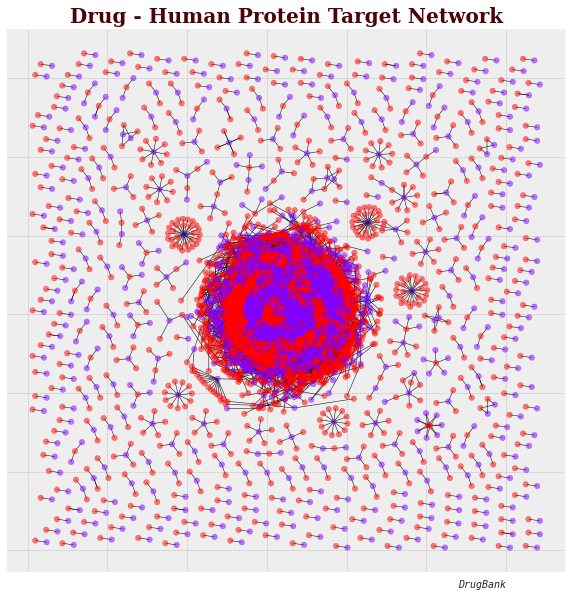

In [ ]:
#Load the graph
drug_humanProt = nx.read_graphml("./Networks_Challenge/DrugBank - Combined Network.graphml")
dic=dict(drug_humanProt.nodes(data=True))
for k in dic:
  if dic[k]["type"]=="chemical":
    dic[k]["Bait_Boolean"]=2
  if dic[k]["type"]=="protein":
    dic[k]["Bait_Boolean"]=0
node_color=[(int(dic[n]["Bait_Boolean"])) for n in dic ]

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(drug_humanProt,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

nx.draw_networkx_nodes(drug_humanProt, pos=pos, node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(drug_humanProt, pos=pos,width=0.5,arrows=False)
#Uncomment to label by node number
#nx.draw_networkx_labels(drug_humanProt,pos=pos, font_size=8, alpha=1)
plt.title("Drug - Human Protein Target Network", fontname='serif', fontsize=20, fontweight='bold', color='#4A040A')
plt.text(3000, -250, 'DrugBank', horizontalalignment='right', verticalalignment='bottom', fontname='monospace', fontstyle='italic')

#print(plt.style.available)
plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
nx.Graph(drug_humanProt)

In [ ]:
dic=dict(drug_humanProt.nodes(data=True))
dic2=collections.defaultdict(str)

for key in dic:
  dic2[key]=dic[key]['name']

drug_humanProt=nx.relabel_nodes(drug_humanProt,dic2)
drug_humanProt.nodes(data=True)

NodeDataView({'UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE': {'name': 'UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', 'represents': 'drugbank:DB07646', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'A1': {'name': 'A1', 'represents': 'uniprot:P97253', 'UniProt Name': 'Light-harvesting protein B-800/850 alpha chain', 'type': 'protein', 'Bait_Boolean': 0}, "Diguanosine-5'-Triphosphate": {'name': "Diguanosine-5'-Triphosphate", 'represents': 'drugbank:DB03931', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'A103R': {'name': 'A103R', 'represents': 'uniprot:Q84424', 'UniProt Name': 'mRNA-capping enzyme', 'type': 'protein', 'Bait_Boolean': 0}, "Guanosine-5'-Triphosphate": {'name': "Guanosine-5'-Triphosphate", 'represents': 'drugbank:DB04137', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'Zinc': {'name': 'Zinc', 'represents': 'drugbank:DB01593', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'A1BG': {'name': 'A1BG', 'represents': 'u

In [ ]:
print(nx.info(drug_humanProt))

Name: DrugBank - Combined Network
Type: MultiDiGraph
Number of nodes: 11994
Number of edges: 27799
Average in degree:   2.3177
Average out degree:   2.3177


## Lung network

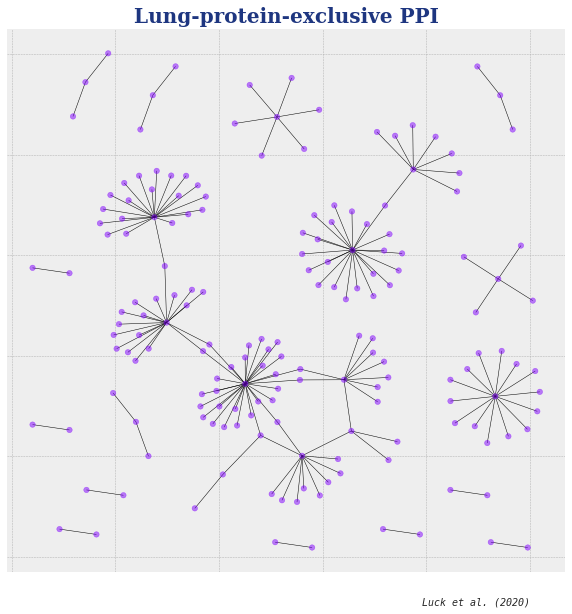

In [ ]:
#Load the graph
lung_net = nx.read_graphml("./Networks_Challenge/lung.graphml")

dic=dict(lung_net.nodes(data=True))
for k in dic:
  dic[k]["Bait_Boolean"] = 0
node_color=[((int(dic[n]["Bait_Boolean"]))) for n in dic ]

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(lung_net,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(lung_net, pos=pos, node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(lung_net, pos=pos,width=0.5,arrows=False)

#Uncomment to label by node number
#nx.draw_networkx_labels(lung_net,pos=pos, font_size=8, alpha=1)
plt.title("Lung-protein-exclusive PPI", fontname='serif', fontsize=20, fontweight='bold', color='#1E3680')
plt.text(1000, -100, 'Luck et al. (2020)', horizontalalignment='right', verticalalignment='bottom', fontname='monospace', fontstyle='italic')

plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
nx.Graph(lung_net)

In [ ]:
dic=dict(lung_net.nodes(data=True))
dic2=collections.defaultdict(str)

for key in dic:
  dic2[key]=dic[key]['name']

lung_net=nx.relabel_nodes(lung_net,dic2)
lung_net.nodes(data=True)

NodeDataView({'ENSG00000116670': {'name': 'ENSG00000116670', 'wordcloud.sync': 'false', 'symbol': 'MAD2L2', 'descr': 'mitotic arrest deficient 2 like 2', 'TiP_value': '0.247945141564', 'TiP_value_discrete': '0.0', 'expr': '9.937697195792584', 'id': '0', 'Bait_Boolean': 0}, 'ENSG00000093010': {'name': 'ENSG00000093010', 'wordcloud.sync': 'false', 'symbol': 'COMT', 'descr': 'catechol-O-methyltransferase', 'TiP_value': '0.349958603224', 'TiP_value_discrete': '0.0', 'expr': '11.0716983956499', 'id': '1', 'Bait_Boolean': 0}, 'ENSG00000068615': {'name': 'ENSG00000068615', 'wordcloud.sync': 'false', 'symbol': 'REEP1', 'descr': 'receptor accessory protein 1', 'TiP_value': '-0.177656730212', 'TiP_value_discrete': '0.0', 'expr': '8.683825711614977', 'id': '2', 'Bait_Boolean': 0}, 'ENSG00000115661': {'name': 'ENSG00000115661', 'symbol': 'STK16', 'descr': 'serine/threonine kinase 16', 'TiP_value': '-0.145880691678', 'TiP_value_discrete': '0.0', 'expr': '9.081139996038821', 'id': '3', 'Bait_Boolean

In [ ]:
print(nx.info(lung_net))

Name: lung
Type: DiGraph
Number of nodes: 175
Number of edges: 162
Average in degree:   0.9257
Average out degree:   0.9257


## Merge lung

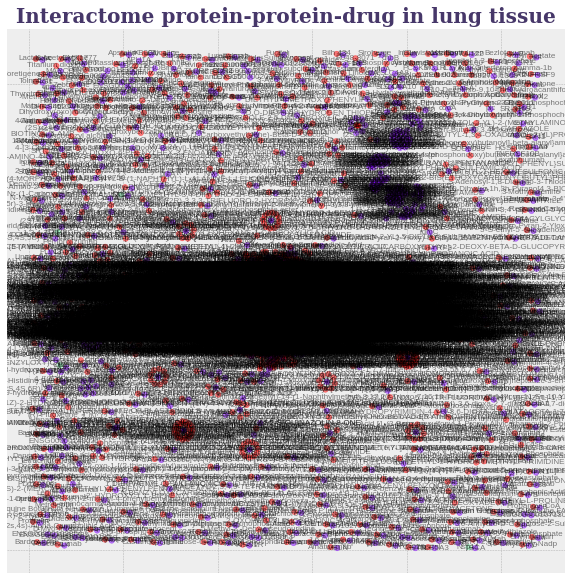

In [ ]:
#Load the graph
#We use "compose" to avoid loss of data if there are nodes with the same name in more than one network.nodes(data=True)

listNetworks = [nx.Graph(sarscov2_human), nx.Graph(drug_humanProt), nx.Graph(lung_net)]
lung_merge = nx.compose_all(listNetworks)

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(lung_merge,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(lung_merge.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(lung_merge, pos=pos, node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(lung_merge, pos=pos,width=0.5,arrows=False)
nx.draw_networkx_labels(lung_merge,pos=pos, font_size=8, alpha=0.5)
plt.title("Interactome protein-protein-drug in lung tissue", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
lung_merge.nodes(data=True)

NodeDataView({'E': {'name': 'E', 'Bait_Boolean': 0, 'represents': 'uniprot:P00720', 'UniProt Name': 'Endolysin', 'type': 'protein'}, 'AP3B1': {'name': 'AP3B1', 'Bait_Boolean': '0'}, 'BRD4': {'name': 'BRD4', 'Bait_Boolean': '0'}, 'BRD2': {'name': 'BRD2', 'Bait_Boolean': '0'}, 'CWC27': {'name': 'CWC27', 'Bait_Boolean': '0'}, 'ZC3H18': {'name': 'ZC3H18', 'Bait_Boolean': '0'}, 'SLC44A2': {'name': 'SLC44A2', 'Bait_Boolean': 0, 'represents': 'uniprot:Q8IWA5', 'UniProt Name': 'Choline transporter-like protein 2', 'type': 'protein'}, 'M': {'name': 'M', 'Bait_Boolean': 0, 'represents': 'uniprot:P21430', 'UniProt Name': 'Matrix protein 2', 'type': 'protein'}, 'PMPCB': {'name': 'PMPCB', 'Bait_Boolean': '0'}, 'YIF1A': {'name': 'YIF1A', 'Bait_Boolean': '0'}, 'ATP1B1': {'name': 'ATP1B1', 'Bait_Boolean': 0, 'represents': 'uniprot:P05026', 'UniProt Name': 'Sodium/potassium-transporting ATPase subunit beta-1', 'type': 'protein'}, 'ACADM': {'name': 'ACADM', 'Bait_Boolean': 0, 'represents': 'uniprot:P113

Sacar los grados, y obtener las proteínas de covid más conectadas

In [ ]:
# The nx.degree function outputs the degree of each node in the network
list_viral_proteins = []
for node in lung_merge.nodes():
  if (lung_merge.nodes(data='Bait_Boolean')[node]=='1'):
    list_viral_proteins.append(node)
print(list_viral_proteins)
#sub_lung_merge = lung_merge.subgraph(list_viral_proteins)
print(lung_merge.degree(list_viral_proteins))

['N', 'Spike', 'Nsp1', 'Nsp10', 'Nsp11', 'Nsp12', 'Nsp13', 'Nsp14', 'Nsp15', 'Nsp2', 'Nsp4', 'Nsp5', 'Nsp5 C145A', 'Nsp6', 'Nsp7', 'Nsp8', 'Nsp9', 'Orf10', 'Orf3a', 'Orf3b', 'Orf6', 'Orf7a', 'Orf8', 'Orf9b', 'Orf9c']
[('N', 15), ('Spike', 2), ('Nsp1', 6), ('Nsp10', 5), ('Nsp11', 1), ('Nsp12', 20), ('Nsp13', 40), ('Nsp14', 3), ('Nsp15', 3), ('Nsp2', 7), ('Nsp4', 8), ('Nsp5', 1), ('Nsp5 C145A', 2), ('Nsp6', 4), ('Nsp7', 32), ('Nsp8', 24), ('Nsp9', 16), ('Orf10', 9), ('Orf3a', 8), ('Orf3b', 1), ('Orf6', 3), ('Orf7a', 2), ('Orf8', 47), ('Orf9b', 11), ('Orf9c', 26)]


In [ ]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(lung_merge.degree(list_viral_proteins), key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node)
print(degree)

('Orf8', 'Nsp13', 'Nsp7', 'Orf9c', 'Nsp8', 'Nsp12', 'Nsp9', 'N', 'Orf9b', 'Orf10', 'Nsp4', 'Orf3a', 'Nsp2', 'Nsp1', 'Nsp10', 'Nsp6', 'Nsp14', 'Nsp15', 'Orf6', 'Spike', 'Nsp5 C145A', 'Orf7a', 'Nsp11', 'Nsp5', 'Orf3b')
(47, 40, 32, 26, 24, 20, 16, 15, 11, 9, 8, 8, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1)


<BarContainer object of 25 artists>

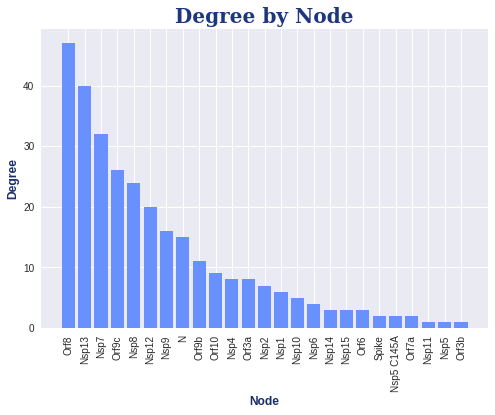

In [ ]:
# Plot the degree of each node
plt.style.use('seaborn') #ggplot, seaborn, bmh

ax = plt.subplot(111)
ax.set_title('Degree by Node', fontname='serif', fontsize=20, fontweight='bold', color='#1E3680')
ax.set_xlabel('Node', fontname='sans-serif', fontsize=12, fontweight='heavy', color='#182E69')
ax.set_ylabel('Degree', fontname='sans-serif', fontsize=12, fontweight='heavy', color='#182E69')
plt.xticks(rotation=90) 
ax.bar(node,degree, color='#6990FF')

Sacar el plot del nodo de interés

In [ ]:
#Node with the highest degree
neighbors_Nsp1 = []
for n in lung_merge.neighbors('Nsp1'):
  if lung_merge.nodes(data='Bait_Boolean')[n] != 1 or lung_merge.nodes(data='Bait_Boolean')[n] != '1':
    neighbors_Nsp1.append(n)
print(len(neighbors_Nsp1))
neighbors_Nsp1.append('Nsp1')

Nsp1_network = lung_merge.subgraph(neighbors_Nsp1)
print([n for n in Nsp1_network.nodes()])


neighbors_Orf7a = []
for n in lung_merge.neighbors('Orf7a'):
  if lung_merge.nodes(data='Bait_Boolean')[n] != 1 or lung_merge.nodes(data='Bait_Boolean')[n] != '1':
    neighbors_Orf7a.append(n)
print(len(neighbors_Orf7a))
neighbors_Orf7a.append('Orf7a')

Orf7a_network = lung_merge.subgraph(neighbors_Orf7a)
print([n for n in Orf7a_network.nodes()])


6
['Nsp1', 'PRIM2', 'COLGALT1', 'PKP2', 'PRIM1', 'POLA2', 'POLA1']
2
['MDN1', 'Orf7a', 'HEATR3']


In [ ]:
Nsp1_network.nodes(data=True)

NodeDataView({'Nsp1': {'name': 'Nsp1', 'Bait_Boolean': '1'}, 'PRIM2': {'name': 'PRIM2', 'Bait_Boolean': '0'}, 'COLGALT1': {'name': 'COLGALT1', 'Bait_Boolean': '0'}, 'PKP2': {'name': 'PKP2', 'Bait_Boolean': '0'}, 'PRIM1': {'name': 'PRIM1', 'Bait_Boolean': '0'}, 'POLA2': {'name': 'POLA2', 'Bait_Boolean': 0, 'represents': 'uniprot:Q14181', 'UniProt Name': 'DNA polymerase alpha subunit B', 'type': 'protein'}, 'POLA1': {'name': 'POLA1', 'Bait_Boolean': 0, 'represents': 'uniprot:P09884', 'UniProt Name': 'DNA polymerase alpha catalytic subunit', 'type': 'protein'}})

In [ ]:
Orf7a_network.nodes(data=True)

NodeDataView({'MDN1': {'name': 'MDN1', 'Bait_Boolean': '0'}, 'Orf7a': {'name': 'Orf7a', 'Bait_Boolean': '1'}, 'HEATR3': {'name': 'HEATR3', 'Bait_Boolean': '0'}})

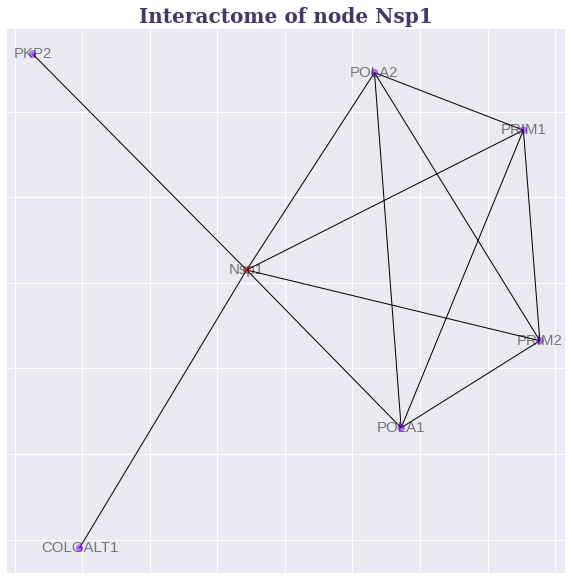

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Nsp1_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Nsp1_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Nsp1_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Nsp1_network, pos=pos,width=1, arrows=False)
nx.draw_networkx_labels(Nsp1_network,pos=pos, font_size=15, alpha=0.5)
plt.title("Interactome of node Nsp1", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

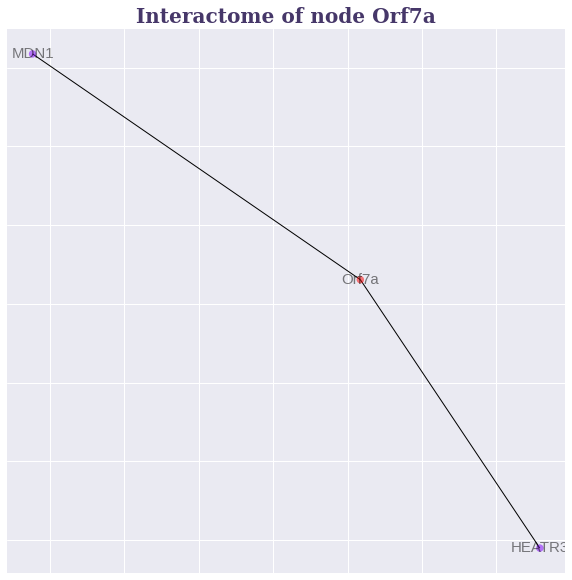

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Orf7a_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Orf7a_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Orf7a_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Orf7a_network, pos=pos,width=1, arrows=False)
nx.draw_networkx_labels(Orf7a_network,pos=pos, font_size=15, alpha=0.5)
plt.title("Interactome of node Orf7a", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

In [ ]:
print(list(lung_merge.neighbors('Nsp1')))

['PKP2', 'COLGALT1', 'POLA2', 'PRIM2', 'PRIM1', 'POLA1']


In [ ]:
print(list(lung_merge.neighbors('Orf7a')))

['MDN1', 'HEATR3']


Sacar las proteínas directamente conectadas

In [ ]:
Nsp1_node_human_proteins = []
for n in lung_merge.neighbors('Nsp1'):
  if lung_merge.nodes(data='Bait_Boolean')[n] == 0 or lung_merge.nodes(data='Bait_Boolean')[n] == '0':
    if n in list(lung_net.nodes()):
      Nsp1_node_human_proteins.append(n)
print(len(Nsp1_node_human_proteins))
Nsp1_node_human_proteins.append('Nsp1')

Nsp1_network = lung_merge.subgraph(Nsp1_node_human_proteins)
print([n for n in Nsp1_network.nodes()])


Orf7a_node_human_proteins = []
for n in lung_merge.neighbors('Orf7a'):
  if lung_merge.nodes(data='Bait_Boolean')[n] == 0 or lung_merge.nodes(data='Bait_Boolean')[n] == '0':
    if n in list(lung_net.nodes()):
      Orf7a_node_human_proteins.append(n)
print(len(Orf7a_node_human_proteins))
Orf7a_node_human_proteins.append('Orf7a')

Orf7a_network = lung_merge.subgraph(Orf7a_node_human_proteins)
print([n for n in Orf7a_network.nodes()])

0
['Nsp1']
0
['Orf7a']


In [ ]:
Nsp1_network.nodes(data=True)

NodeDataView({'Nsp1': {'name': 'Nsp1', 'Bait_Boolean': '1'}})

In [ ]:
Orf7a_network.nodes(data=True)

NodeDataView({'Orf7a': {'name': 'Orf7a', 'Bait_Boolean': '1'}})

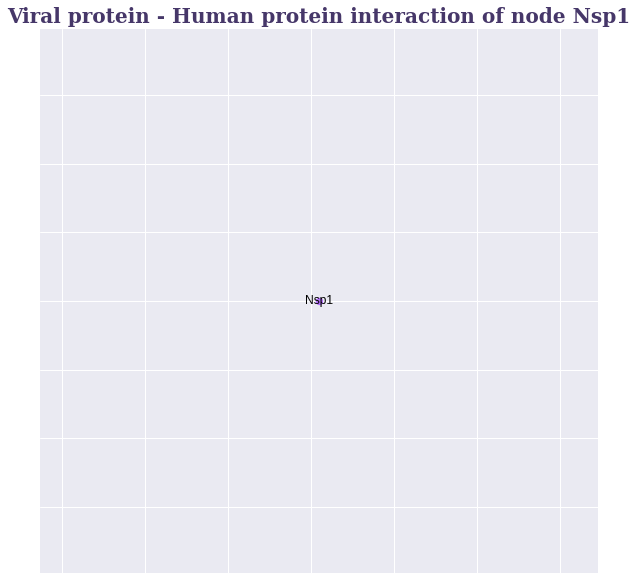

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Nsp1_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Nsp1_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Nsp1_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Nsp1_network, pos=pos,width=1, arrows=False)
# #Uncomment to label by node number
nx.draw_networkx_labels(Nsp1_network,pos=pos, font_size=12, alpha=1)
plt.title("Viral protein - Human protein interaction of node Nsp1", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

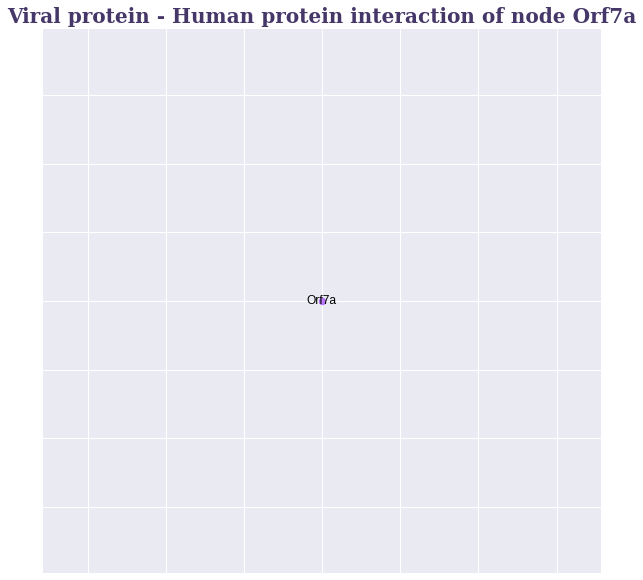

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Orf7a_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Orf7a_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Orf7a_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Orf7a_network, pos=pos,width=1, arrows=False)
# #Uncomment to label by node number
nx.draw_networkx_labels(Orf7a_network,pos=pos, font_size=12, alpha=1)
plt.title("Viral protein - Human protein interaction of node Orf7a", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

3rd generation interactome

In [ ]:
Nsp1_three_level = []
Nsp1_node_human_proteins.remove('Nsp1')

for i in Nsp1_node_human_proteins:
  aux = list(lung_merge.neighbors(i))
  #print(i, aux)
  for n in aux:
    #print(lung_merge.nodes(data='Bait_Boolean')[n])
    if lung_merge.nodes(data='Bait_Boolean')[n] == 2 or lung_merge.nodes(data='Bait_Boolean')[n] == '2':
      if n in list(drug_humanProt.nodes()):
        Nsp1_three_level.append(n)

for j in Nsp1_node_human_proteins:
  Nsp1_three_level.append(j)

Nsp1_three_level.append('Nsp1')
print(len(Nsp1_three_level))

Nsp1_network = lung_merge.subgraph(Nsp1_three_level)
[n for n in Nsp1_network.nodes()]

1


['Nsp1']

In [ ]:
Orf7a_three_level = []
Orf7a_node_human_proteins.remove('Orf7a')

for i in Orf7a_node_human_proteins:
  aux = list(lung_merge.neighbors(i))
  #print(i, aux)
  for n in aux:
    #print(lung_merge.nodes(data='Bait_Boolean')[n])
    if lung_merge.nodes(data='Bait_Boolean')[n] == 2 or lung_merge.nodes(data='Bait_Boolean')[n] == '2':
      if n in list(drug_humanProt.nodes()):
        Orf7a_three_level.append(n)

for j in Orf7a_node_human_proteins:
  Orf7a_three_level.append(j)

Orf7a_three_level.append('Orf7a')
print(len(Orf7a_three_level))

Orf7a_network = lung_merge.subgraph(Orf7a_three_level)
[n for n in Orf7a_network.nodes()]

1


['Orf7a']

In [ ]:
Nsp1_network.nodes(data=True)

NodeDataView({'Nsp1': {'name': 'Nsp1', 'Bait_Boolean': '1'}})

In [ ]:
Orf7a_network.nodes(data=True)

NodeDataView({'Orf7a': {'name': 'Orf7a', 'Bait_Boolean': '1'}})

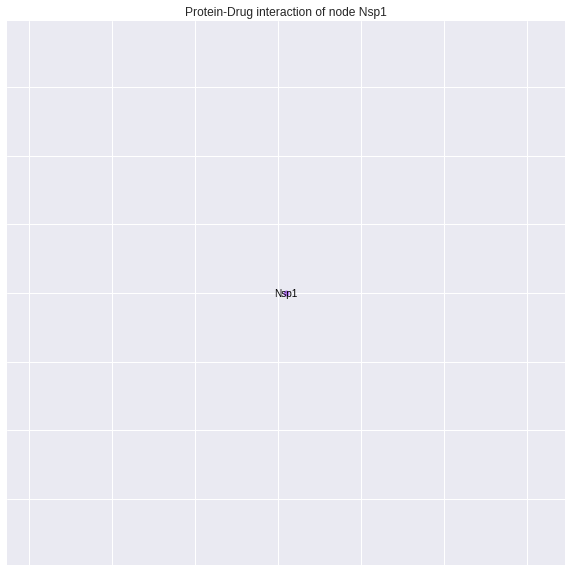

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Nsp1_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Nsp1_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Nsp1_network, pos=pos,node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Nsp1_network, pos=pos,width=1, arrows=False)
nx.draw_networkx_labels(Nsp1_network,pos=pos, font_size=10, alpha=1)
plt.title("Protein-Drug interaction of node Nsp1")
plt.show()

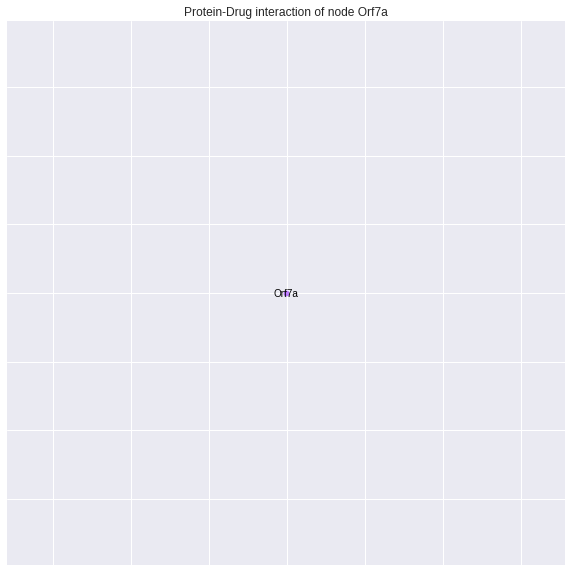

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Orf7a_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Orf7a_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Orf7a_network, pos=pos,node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Orf7a_network, pos=pos,width=1, arrows=False)
nx.draw_networkx_labels(Orf7a_network,pos=pos, font_size=10, alpha=1)
plt.title("Protein-Drug interaction of node Orf7a")
plt.show()

## Liver Network


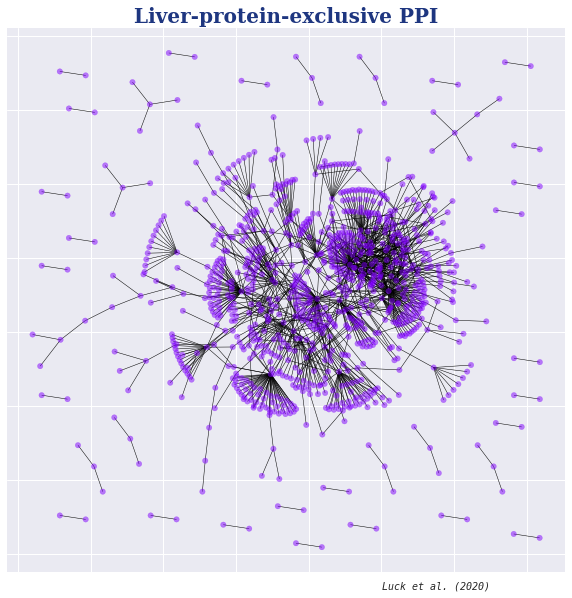

In [ ]:
#Load the graph
liver_net = nx.read_graphml("./Networks_Challenge/liver.graphml")

dic=dict(liver_net.nodes(data=True))
for k in dic:
  dic[k]["Bait_Boolean"] = 0
node_color=[((int(dic[n]["Bait_Boolean"]))) for n in dic ]

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(liver_net,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

nx.draw_networkx_nodes(liver_net, pos=pos, node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(liver_net, pos=pos,width=0.5,arrows=False)

#Uncomment to label by node number
#nx.draw_networkx_labels(liver_net,pos=pos, font_size=8, alpha=1)
plt.title("Liver-protein-exclusive PPI", fontname='serif', fontsize=20, fontweight='bold', color='#1E3680')
plt.text(1300, -100, 'Luck et al. (2020)', horizontalalignment='right', verticalalignment='bottom', fontname='monospace', fontstyle='italic')

plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
nx.Graph(liver_net)

In [ ]:
dic=dict(liver_net.nodes(data=True))
dic2=collections.defaultdict(str)

for key in dic:
  dic2[key]=dic[key]['name']

liver_net=nx.relabel_nodes(liver_net,dic2)
liver_net.nodes(data=True)

NodeDataView({'ENSG00000101236': {'name': 'ENSG00000101236', 'symbol': 'RNF24', 'descr': 'ring finger protein 24', 'TiP_value': '-2.08786008735', 'TiP_value_discrete': '0.0', 'expr': '8.89030800413892', 'id': '0', 'Bait_Boolean': 0}, 'ENSG00000130813': {'name': 'ENSG00000130813', 'symbol': 'C19orf66', 'descr': 'chromosome 19 open reading frame 66', 'TiP_value': '3.15679900936', 'TiP_value_discrete': '3.0', 'expr': '12.054795997653901', 'id': '1', 'Bait_Boolean': 0}, 'ENSG00000166326': {'name': 'ENSG00000166326', 'symbol': 'TRIM44', 'descr': 'tripartite motif containing 44', 'TiP_value': '-0.499917881408', 'TiP_value_discrete': '0.0', 'expr': '10.136308621013802', 'id': '2', 'Bait_Boolean': 0}, 'ENSG00000170271': {'name': 'ENSG00000170271', 'symbol': 'FAXDC2', 'descr': 'fatty acid hydroxylase domain containing 2', 'TiP_value': '0.544506226313', 'TiP_value_discrete': '0.0', 'expr': '12.27309529609', 'id': '3', 'Bait_Boolean': 0}, 'ENSG00000006611': {'name': 'ENSG00000006611', 'wordcloud.

In [ ]:
print(nx.info(liver_net))

Name: liver
Type: DiGraph
Number of nodes: 988
Number of edges: 1296
Average in degree:   1.3117
Average out degree:   1.3117


##Merge liver

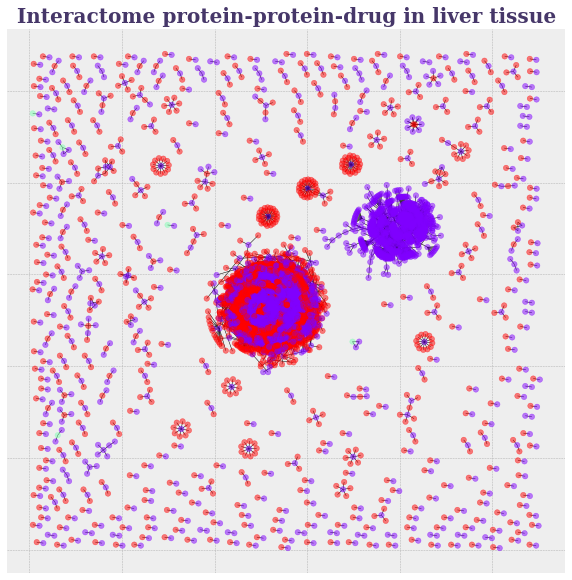

In [ ]:
#Load the graph
#We use "compose" to avoid loss of data if there are nodes with the same name in more than one network.nodes(data=True)

listNetworks = [nx.Graph(sarscov2_human), nx.Graph(drug_humanProt), nx.Graph(liver_net)]
liver_merge = nx.compose_all(listNetworks)

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(liver_merge,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(liver_merge.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(liver_merge, pos=pos, node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(liver_merge, pos=pos,width=0.5,arrows=False)
#Uncomment to label by node number
#nx.draw_networkx_labels(liver_merge,pos=pos, font_size=8, alpha=1)
plt.title("Interactome protein-protein-drug in liver tissue", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
liver_merge.nodes(data=True)

NodeDataView({'E': {'name': 'E', 'Bait_Boolean': 0, 'represents': 'uniprot:P00720', 'UniProt Name': 'Endolysin', 'type': 'protein'}, 'AP3B1': {'name': 'AP3B1', 'Bait_Boolean': '0'}, 'BRD4': {'name': 'BRD4', 'Bait_Boolean': '0'}, 'BRD2': {'name': 'BRD2', 'Bait_Boolean': '0'}, 'CWC27': {'name': 'CWC27', 'Bait_Boolean': '0'}, 'ZC3H18': {'name': 'ZC3H18', 'Bait_Boolean': '0'}, 'SLC44A2': {'name': 'SLC44A2', 'Bait_Boolean': 0, 'represents': 'uniprot:Q8IWA5', 'UniProt Name': 'Choline transporter-like protein 2', 'type': 'protein'}, 'M': {'name': 'M', 'Bait_Boolean': 0, 'represents': 'uniprot:P21430', 'UniProt Name': 'Matrix protein 2', 'type': 'protein'}, 'PMPCB': {'name': 'PMPCB', 'Bait_Boolean': '0'}, 'YIF1A': {'name': 'YIF1A', 'Bait_Boolean': '0'}, 'ATP1B1': {'name': 'ATP1B1', 'Bait_Boolean': 0, 'represents': 'uniprot:P05026', 'UniProt Name': 'Sodium/potassium-transporting ATPase subunit beta-1', 'type': 'protein'}, 'ACADM': {'name': 'ACADM', 'Bait_Boolean': 0, 'represents': 'uniprot:P113

Sacar los grados, y obtener las proteínas de covid más conectadas

In [ ]:
# The nx.degree function outputs the degree of each node in the network
list_viral_proteins = []
for node in liver_merge.nodes():
  if liver_merge.nodes(data='Bait_Boolean')[node]=='1' or liver_merge.nodes(data='Bait_Boolean')[node]==1:
    list_viral_proteins.append(node)
print(list_viral_proteins)
#sub_lung_merge = lung_merge.subgraph(list_viral_proteins)
print(liver_merge.degree(list_viral_proteins))

['N', 'Spike', 'Nsp1', 'Nsp10', 'Nsp11', 'Nsp12', 'Nsp13', 'Nsp14', 'Nsp15', 'Nsp2', 'Nsp4', 'Nsp5', 'Nsp5 C145A', 'Nsp6', 'Nsp7', 'Nsp8', 'Nsp9', 'Orf10', 'Orf3a', 'Orf3b', 'Orf6', 'Orf7a', 'Orf8', 'Orf9b', 'Orf9c']
[('N', 15), ('Spike', 2), ('Nsp1', 6), ('Nsp10', 5), ('Nsp11', 1), ('Nsp12', 20), ('Nsp13', 40), ('Nsp14', 3), ('Nsp15', 3), ('Nsp2', 7), ('Nsp4', 8), ('Nsp5', 1), ('Nsp5 C145A', 2), ('Nsp6', 4), ('Nsp7', 32), ('Nsp8', 24), ('Nsp9', 16), ('Orf10', 9), ('Orf3a', 8), ('Orf3b', 1), ('Orf6', 3), ('Orf7a', 2), ('Orf8', 47), ('Orf9b', 11), ('Orf9c', 26)]


In [ ]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(liver_merge.degree(list_viral_proteins), key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node)
print(degree)

('Orf8', 'Nsp13', 'Nsp7', 'Orf9c', 'Nsp8', 'Nsp12', 'Nsp9', 'N', 'Orf9b', 'Orf10', 'Nsp4', 'Orf3a', 'Nsp2', 'Nsp1', 'Nsp10', 'Nsp6', 'Nsp14', 'Nsp15', 'Orf6', 'Spike', 'Nsp5 C145A', 'Orf7a', 'Nsp11', 'Nsp5', 'Orf3b')
(47, 40, 32, 26, 24, 20, 16, 15, 11, 9, 8, 8, 7, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1)


<BarContainer object of 25 artists>

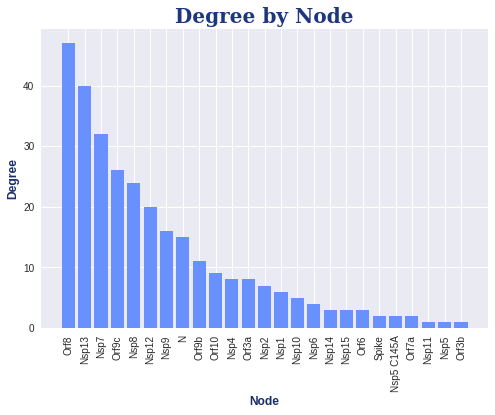

In [ ]:
# Plot the degree of each node
plt.style.use('seaborn') #ggplot, seaborn, bmh

ax = plt.subplot(111)
ax.set_title('Degree by Node', fontname='serif', fontsize=20, fontweight='bold', color='#1E3680')
ax.set_xlabel('Node', fontname='sans-serif', fontsize=12, fontweight='heavy', color='#182E69')
ax.set_ylabel('Degree', fontname='sans-serif', fontsize=12, fontweight='heavy', color='#182E69')
plt.xticks(rotation=90) 
ax.bar(node,degree, color='#6990FF')

Sacar el plot del nodo más conectado

In [ ]:
#Node with the highest degree
neighbors_Nsp1 = []
for n in liver_merge.neighbors('Nsp1'):
  if liver_merge.nodes(data='Bait_Boolean')[n] != 1 or liver_merge.nodes(data='Bait_Boolean')[n] != '1':
    neighbors_Nsp1.append(n)
print(len(neighbors_Nsp1))
neighbors_Nsp1.append('Nsp1')

Nsp1_network = liver_merge.subgraph(neighbors_Nsp1)
print([n for n in Nsp1_network.nodes()])


neighbors_Orf7a = []
for n in liver_merge.neighbors('Orf7a'):
  if liver_merge.nodes(data='Bait_Boolean')[n] != 1 or liver_merge.nodes(data='Bait_Boolean')[n] != '1':
    neighbors_Orf7a.append(n)
print(len(neighbors_Orf7a))
neighbors_Orf7a.append('Orf7a')

Orf7a_network = liver_merge.subgraph(neighbors_Orf7a)
print([n for n in Orf7a_network.nodes()])


6
['Nsp1', 'PRIM2', 'COLGALT1', 'PKP2', 'PRIM1', 'POLA2', 'POLA1']
2
['MDN1', 'Orf7a', 'HEATR3']


In [ ]:
Nsp1_network.nodes(data=True)

NodeDataView({'Nsp1': {'name': 'Nsp1', 'Bait_Boolean': '1'}, 'PRIM2': {'name': 'PRIM2', 'Bait_Boolean': '0'}, 'COLGALT1': {'name': 'COLGALT1', 'Bait_Boolean': '0'}, 'PKP2': {'name': 'PKP2', 'Bait_Boolean': '0'}, 'PRIM1': {'name': 'PRIM1', 'Bait_Boolean': '0'}, 'POLA2': {'name': 'POLA2', 'Bait_Boolean': 0, 'represents': 'uniprot:Q14181', 'UniProt Name': 'DNA polymerase alpha subunit B', 'type': 'protein'}, 'POLA1': {'name': 'POLA1', 'Bait_Boolean': 0, 'represents': 'uniprot:P09884', 'UniProt Name': 'DNA polymerase alpha catalytic subunit', 'type': 'protein'}})

In [ ]:
Orf7a_network.nodes(data=True)

NodeDataView({'MDN1': {'name': 'MDN1', 'Bait_Boolean': '0'}, 'Orf7a': {'name': 'Orf7a', 'Bait_Boolean': '1'}, 'HEATR3': {'name': 'HEATR3', 'Bait_Boolean': '0'}})

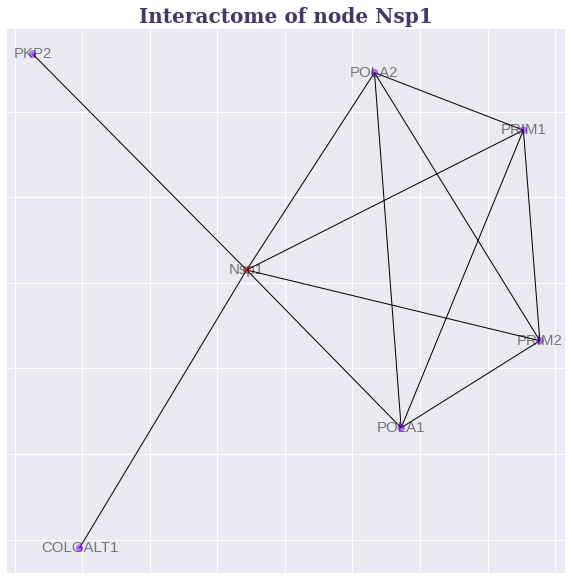

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Nsp1_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Nsp1_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Nsp1_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Nsp1_network, pos=pos,width=1, arrows=False)
nx.draw_networkx_labels(Nsp1_network,pos=pos, font_size=15, alpha=0.5)
plt.title("Interactome of node Nsp1", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

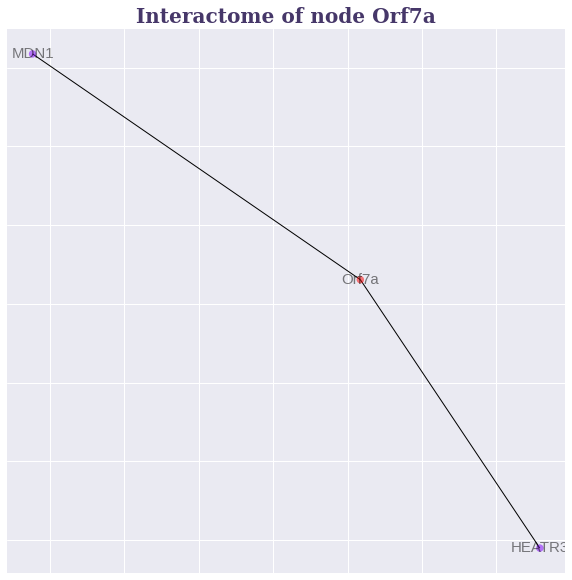

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Orf7a_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Orf7a_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Orf7a_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Orf7a_network, pos=pos,width=1, arrows=False)
nx.draw_networkx_labels(Orf7a_network,pos=pos, font_size=15, alpha=0.5)
plt.title("Interactome of node Orf7a", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

In [ ]:
print(list(liver_merge.neighbors('Nsp1')))

['PKP2', 'COLGALT1', 'POLA2', 'PRIM2', 'PRIM1', 'POLA1']


In [ ]:
print(list(liver_merge.neighbors('Orf7a')))

['MDN1', 'HEATR3']


Sacar las proteínas directamente conectadas

In [ ]:
Nsp1_node_human_proteins = []
for n in liver_merge.neighbors('Nsp1'):
  if liver_merge.nodes(data='Bait_Boolean')[n] == 0 or liver_merge.nodes(data='Bait_Boolean')[n] == '0':
    if n in list(liver_net.nodes()):
      Nsp1_node_human_proteins.append(n)
print(len(Nsp1_node_human_proteins))
Nsp1_node_human_proteins.append('Nsp1')

Nsp1_network = liver_merge.subgraph(Nsp1_node_human_proteins)
print([n for n in Nsp1_network.nodes()])


Orf7a_node_human_proteins = []
for n in liver_merge.neighbors('Orf7a'):
  if liver_merge.nodes(data='Bait_Boolean')[n] == 0 or liver_merge.nodes(data='Bait_Boolean')[n] == '0':
    if n in list(liver_net.nodes()):
      Orf7a_node_human_proteins.append(n)
print(len(Orf7a_node_human_proteins))
Orf7a_node_human_proteins.append('Orf7a')

Orf7a_network = liver_merge.subgraph(Orf7a_node_human_proteins)
print([n for n in Orf7a_network.nodes()])

0
['Nsp1']
0
['Orf7a']


In [ ]:
Nsp1_network.nodes(data=True)

NodeDataView({'Nsp1': {'name': 'Nsp1', 'Bait_Boolean': '1'}})

In [ ]:
Orf7a_network.nodes(data=True)

NodeDataView({'Orf7a': {'name': 'Orf7a', 'Bait_Boolean': '1'}})

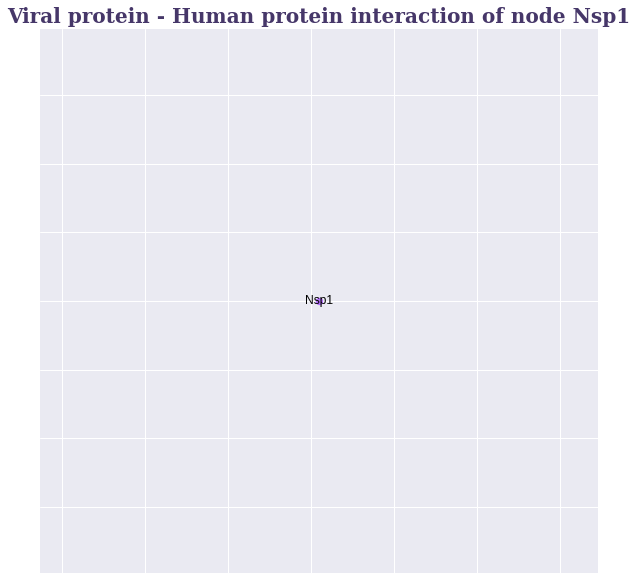

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Nsp1_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Nsp1_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Nsp1_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Nsp1_network, pos=pos,width=1, arrows=False)
# #Uncomment to label by node number
nx.draw_networkx_labels(Nsp1_network,pos=pos, font_size=12, alpha=1)
plt.title("Viral protein - Human protein interaction of node Nsp1", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

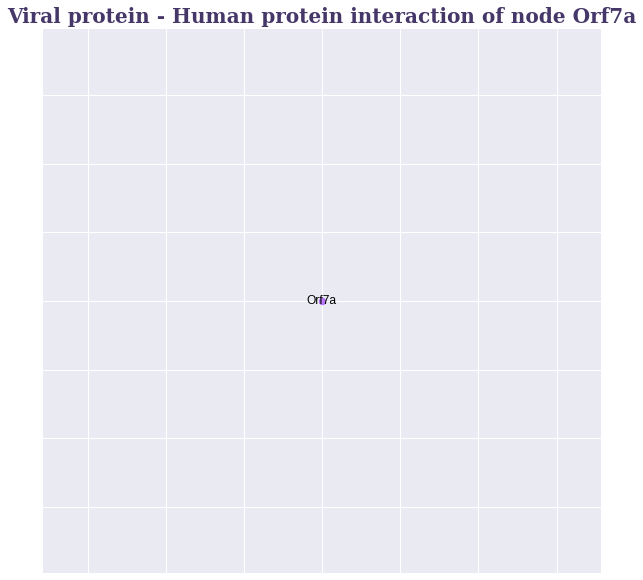

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(Orf7a_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(Orf7a_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(Orf7a_network, pos=pos,node_size=50, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(Orf7a_network, pos=pos,width=1, arrows=False)
# #Uncomment to label by node number
nx.draw_networkx_labels(Orf7a_network,pos=pos, font_size=12, alpha=1)
plt.title("Viral protein - Human protein interaction of node Orf7a", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.show()

3rd generation interactome

In [ ]:
three_level = []
node_human_proteins.remove(high_node)

for i in node_human_proteins:
  aux = list(liver_merge.neighbors(i))
  #print(i, aux)
  for n in aux:
    #print(liver_merge.nodes(data='Bait_Boolean')[n])
    if liver_merge.nodes(data='Bait_Boolean')[n] == 2:
      if n in liver_net.nodes():
        three_level.append(n)

for j in node_human_proteins:
  three_level.append(j)

three_level.append(high_node)
print(len(three_level))

node_network = liver_merge.subgraph(three_level)
[n for n in node_network.nodes()]

74


['Oseltamivir',
 'GDF15',
 'MFGE8',
 'COL6A1',
 'Flucytosine',
 'FOXRED2',
 '1-Ethyl-Pyrrolidine-2,5-Dione',
 'Azacitidine',
 'Copper',
 'IL17RA',
 'Antithymocyte immunoglobulin (rabbit)',
 'NPTX1',
 'Folic Acid',
 'Flavin adenine dinucleotide',
 'INHBE',
 'Cupric sulfate',
 'Conestat alfa',
 'Human C1-esterase inhibitor',
 'ADAMTS1',
 'NPC2',
 'FKBP10',
 'Dexibuprofen',
 'ADAM9',
 'EMC1',
 'STC2',
 'TOR1A',
 'Procainamide',
 'Aminocaproic Acid',
 'Myristic acid',
 'PLD3',
 'DNMT1',
 'FBXL12',
 'INCB7839',
 'NEU1',
 'HS6ST2',
 'PCSK6',
 'SMOC1',
 '5-(DIMETHYLAMINO)-2-NAPHTHALENESULFONIC ACID',
 'UGGT2',
 'ERO1B',
 'FKBP7',
 'EDEM3',
 'PUSL1',
 'HYOU1',
 'ITGB1',
 'NGLY1',
 'ERP44',
 'CHPF2',
 'POGLUT2',
 'CHPF',
 'Sphingosine',
 'POGLUT3',
 'PLAT',
 'POFUT1',
 'SIL1',
 'LOX',
 'Methotrexate',
 'Palifosfamide',
 'Epigallocatechin gallate',
 'PLEKHF2',
 'Decitabine',
 'PVR',
 'Urokinase',
 'PLOD2',
 'GGH',
 'TM2D3',
 'Malonate Ion',
 'Iloprost',
 'Orf8',
 'OS9',
 'ERLEC1',
 'SDF2',
 'Asc

In [ ]:
node_network.nodes(data=True)

NodeDataView({'Oseltamivir': {'name': 'Oseltamivir', 'represents': 'drugbank:DB00198', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'GDF15': {'name': 'GDF15', 'Bait_Boolean': '0'}, 'MFGE8': {'name': 'MFGE8', 'Bait_Boolean': '0'}, 'COL6A1': {'name': 'COL6A1', 'Bait_Boolean': '0'}, 'Flucytosine': {'name': 'Flucytosine', 'represents': 'drugbank:DB01099', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'FOXRED2': {'name': 'FOXRED2', 'Bait_Boolean': '0'}, '1-Ethyl-Pyrrolidine-2,5-Dione': {'name': '1-Ethyl-Pyrrolidine-2,5-Dione', 'represents': 'drugbank:DB01902', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'Azacitidine': {'name': 'Azacitidine', 'represents': 'drugbank:DB00928', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'Copper': {'name': 'Copper', 'represents': 'drugbank:DB09130', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2}, 'IL17RA': {'name': 'IL17RA', 'Bait_Boolean': '0'}, 'Antith

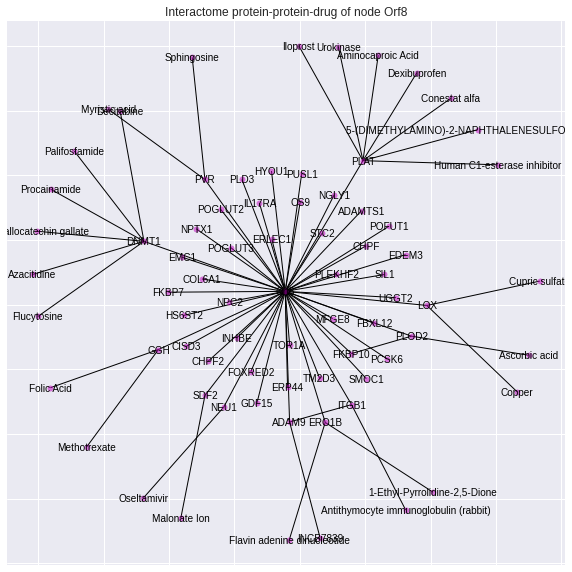

In [ ]:
# Define position of each node
pos = nx.nx_agraph.graphviz_layout(node_network,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))

d=dict(node_network.nodes(data=True))
node_color=[(int(d[n]["Bait_Boolean"])) for n in d ]

nx.draw_networkx_nodes(node_network, pos=pos,node_size=30, node_color=node_color, cmap='rainbow', alpha=0.5)
nx.draw_networkx_edges(node_network, pos=pos,width=1, arrows=False)
# #Uncomment to label by node number
nx.draw_networkx_labels(node_network,pos=pos, font_size=10, alpha=1)
plt.title("Interactome protein-protein-drug of node "+str(high_node))
plt.show()